<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/04.%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/20220511_DACON_FIFA%EC%9D%B4%EC%A0%81%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* 사용할 데이터셋, `FIFA_train.csv` 불러오기

In [6]:
df = pd.read_csv('/content/FIFA_train.csv')
df.shape

(8932, 12)

In [7]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


## 데이터 기본 확인
---

### **| 결측치 확인**

In [9]:
df.isnull().sum()
# 결측치 없음을 확인

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

### **| 기술통계**

In [11]:
# 컬럼들의 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [13]:
# 숫자 자료형
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [14]:
# 숫자 이외의 자료형
df.describe(include = 'object')

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


In [16]:
# 숫자 이외의 자료형의 값 및 개수 확인
for col in ['name', 'continent', 'contract_until','position','prefer_foot']:
  print(col)
  print(df[col].value_counts())

name
L. Messi              1
S. Tanabe             1
P. Wiegers            1
P. Breitkreuz         1
K. Rendón             1
                     ..
P. Álvarez            1
B. Urribarri          1
D. Larsson            1
S. Delev              1
N. Christoffersson    1
Name: name, Length: 8932, dtype: int64
continent
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64
contract_until
2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64
position
MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64
prefer_foot
right    6837
left     2095
Name: prefer_

### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기


<function matplotlib.pyplot.show>

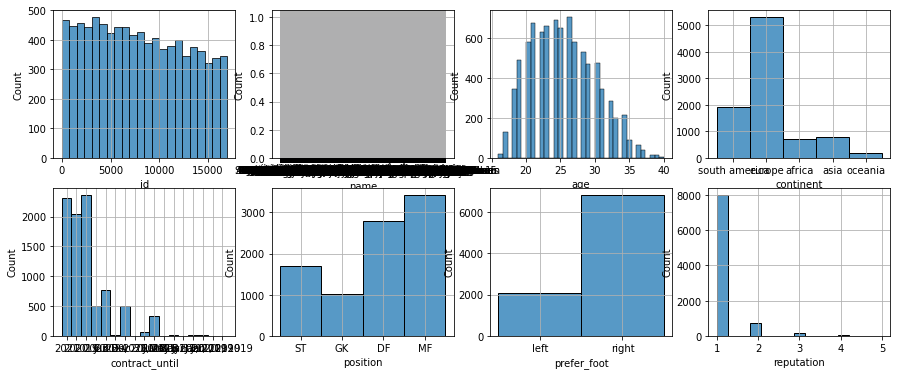

In [17]:
f, axes = plt.subplots(2, 4, figsize = (15,6))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data = df, x = col, ax = ax)
plt.show

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


* 상관관계를 살펴볼 때 필요없는 Id와 name은 삭제

In [22]:
df.drop(['id', 'name'], axis = 1, inplace = True)

* 자료형 정리하기

In [24]:
nums = ['age','reputation', 'stat_overall',
        'stat_potential','stat_skill_moves']
noms = ['continent','contract_until','position','prefer_foot']
y = 'value'

print('숫자/연속 자료형', nums)
print('범주 자료형', noms)
print('예측할 속성/변수', y)

숫자/연속 자료형 ['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']
범주 자료형 ['continent', 'contract_until', 'position', 'prefer_foot']
예측할 속성/변수 value


* 데이터 정리하기
  * 데이터 소개: FIFA에서 제공하는 데이터들을 통해, 선수들의 시장가격과 능력치 사이의 상관 정도를 확인.
  * 자료형 소개 : 
    * 연속 자료형 
      * 'id' : 선수의 ID
      * 'age' : 연령
      * 'reputation' : 선수의 유명한 정도
      * 'stat_overall' : 전반적인 선수의 스탯
      * 'stat_potential' : 선수의 잠재력
      * 'stat_skill_moves' : 선수가 사용하는 개인기
    * 범주 자료형 
      * 'name' : 이름
      * 'continent' : 국적
      * 'contract_until' : 계약 기간
      * 'position' : 포지션
      * 'prefer_foot' : 주로 사용하는 발
  * 모델링을 위한 자료형 구분: 위와 동일



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

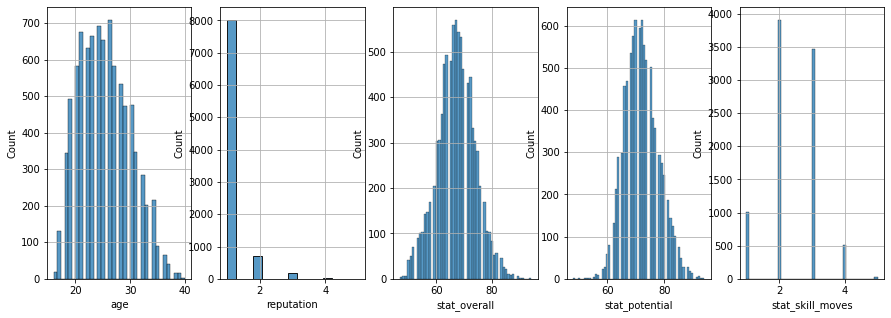

In [25]:
f, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

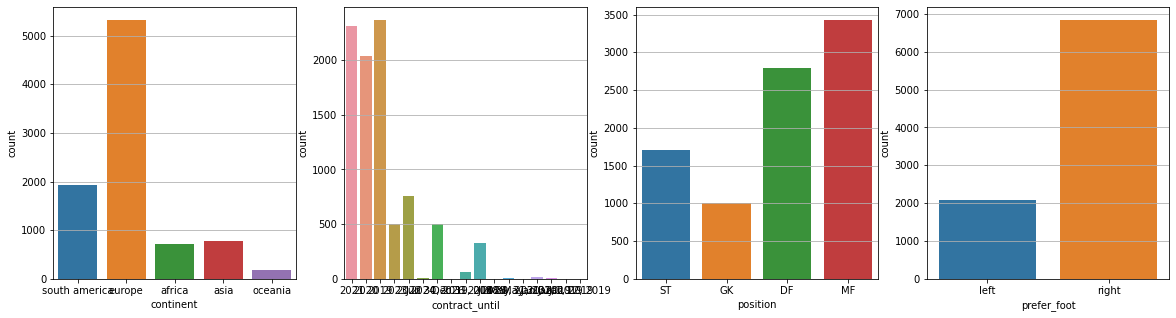

In [27]:
f, axes = plt.subplots(1, len(noms), figsize=(20,5))
axes = axes.flatten()
for col, ax in zip(noms, axes):
  sns.countplot(data=df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [28]:
df.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


* boxplot 으로 연속 자료형 기술 통계 시각화하기

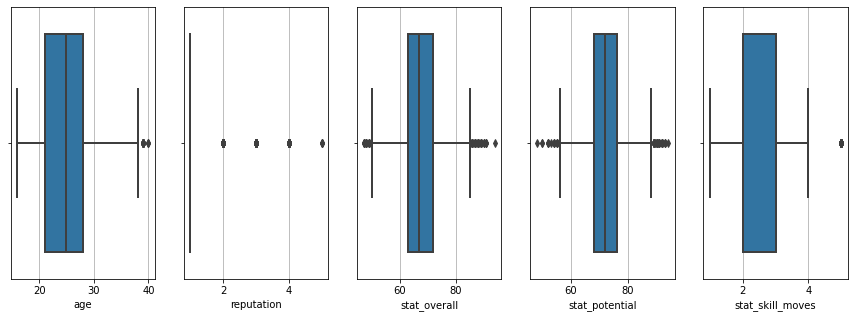

In [34]:
f, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.boxplot(data=df, x=col, ax=ax)
plt.show()

* violinplot 으로 연속 자료형 기술 통계 시각화하기

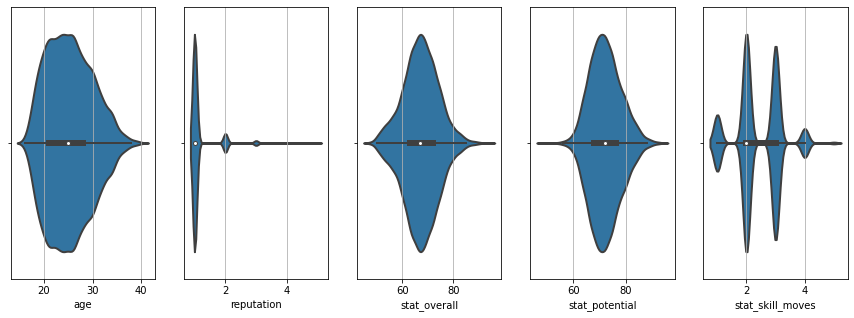

In [33]:
f, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.violinplot(data=df, x=col, ax=ax)
plt.show()

* `skew` 이용해 왜도 구한 후 시각화

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


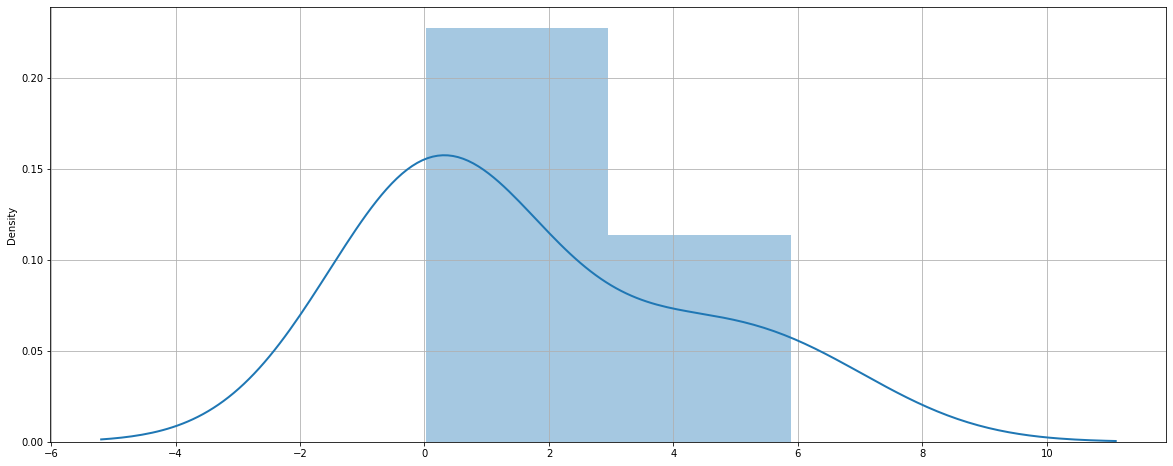

In [35]:
sns.distplot(df.skew())

plt.show()

* `kurt` 이용해 첨도 구하고 시각화

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


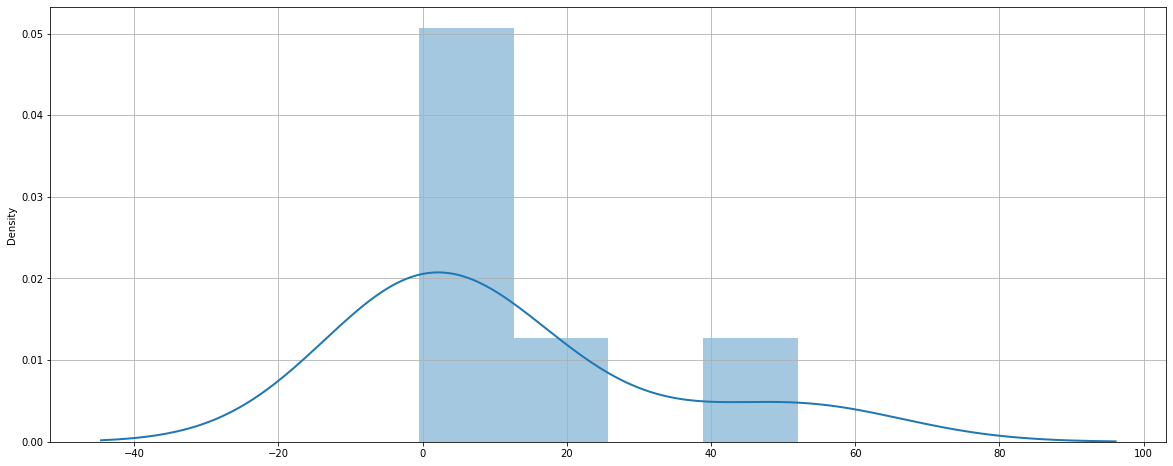

In [36]:
sns.distplot(df.kurt())

plt.show()

## 속성간 관계 파악
---

### **| 상관분석**

In [40]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


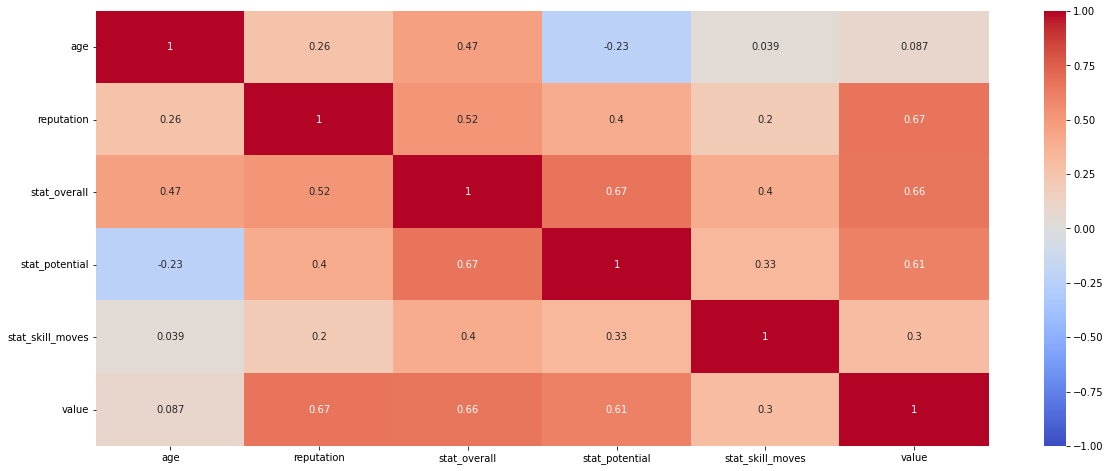

In [39]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

value와 reputation, stat_overall, stat_potential은 높은 양의 관계이며,

stat_skill_moves와는 낮은 양의 관계,

age와는 매우 낮은 양의 관계이다.

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

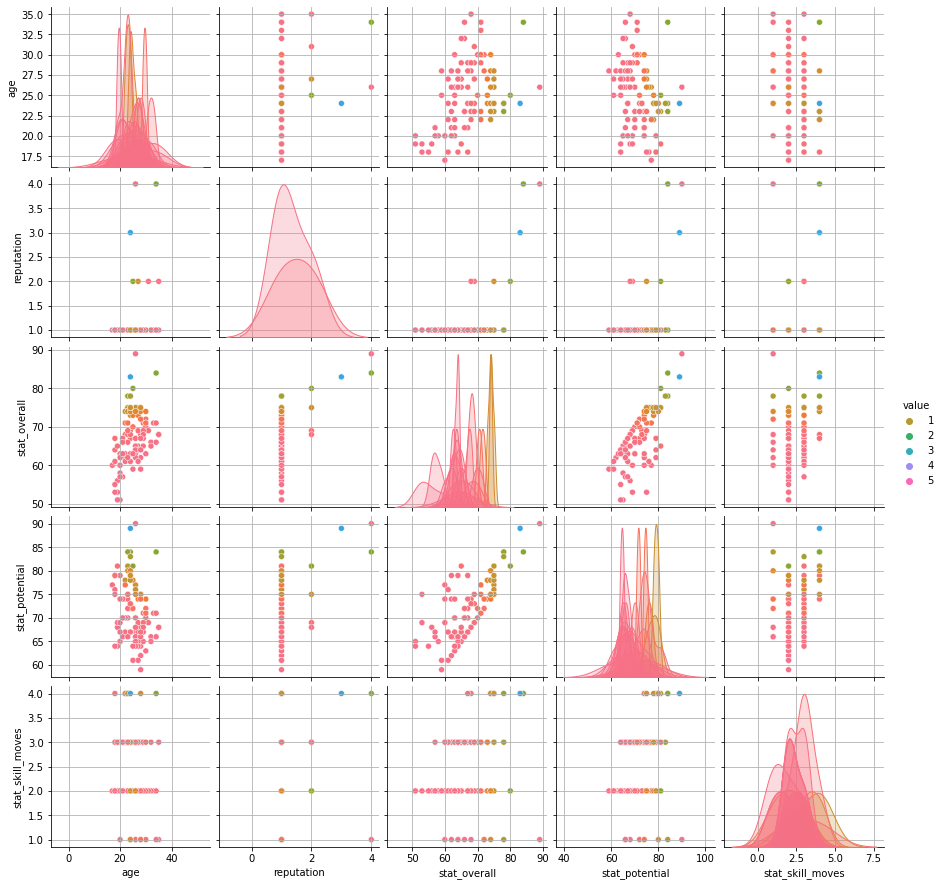

In [52]:
# 데이터가 많기 때문에 일부만 추출해서 시각화
sns.pairplot(df.sample(100), hue = y, palette = 'husl')

* `displot` 이용해 연속 자료형 별 예측값의 분포 `kde` 선으로 시각화 하기 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

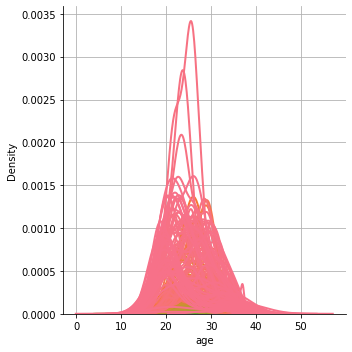

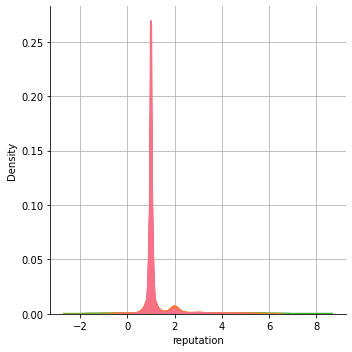

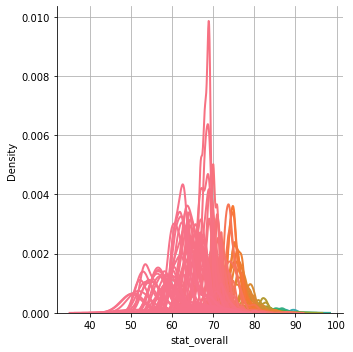

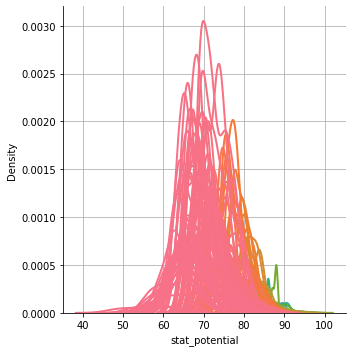

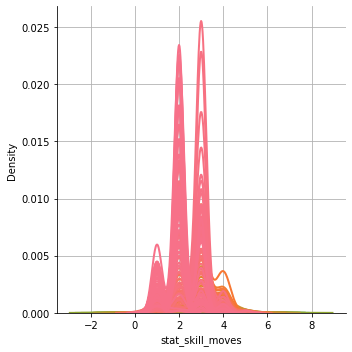

In [77]:
for col in nums:
  sns.displot(data = df, x = col, kind = 'kde', hue = y, legend = False, palette = 'husl')
plt.show()

* 위의 플롯에서 `prefer_foot`을 col에 추가 시킨 후 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

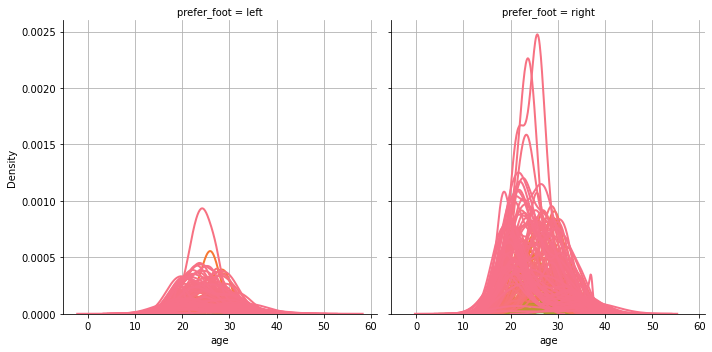

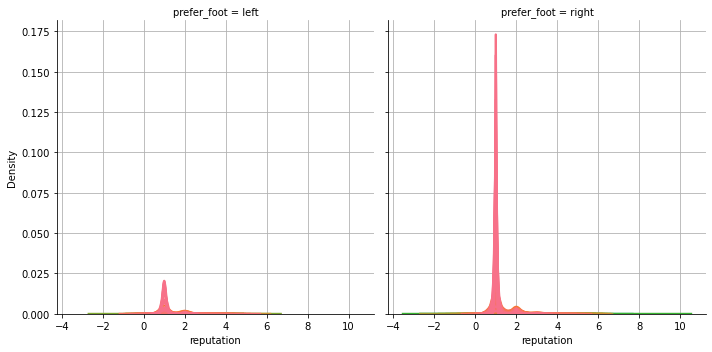

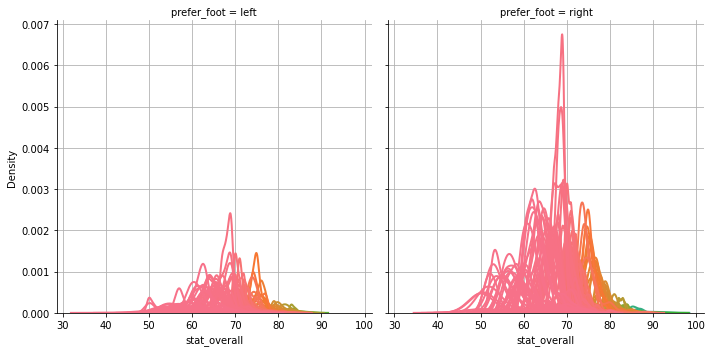

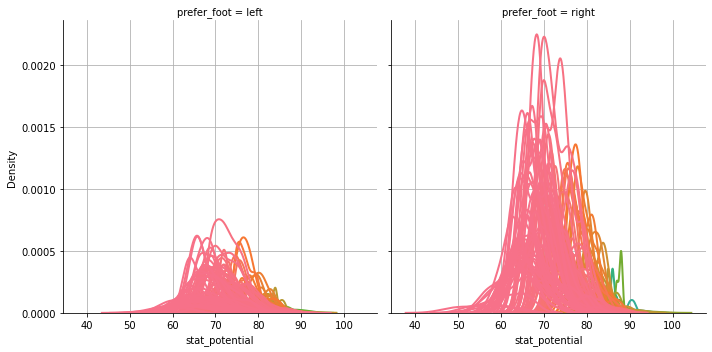

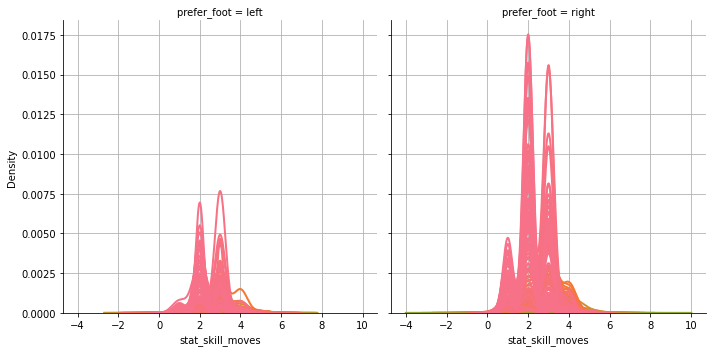

In [57]:
for col in nums:
  sns.displot(data = df, x = col, kind = 'kde', hue = y, legend = False, palette = 'husl', col = 'prefer_foot')
plt.show()

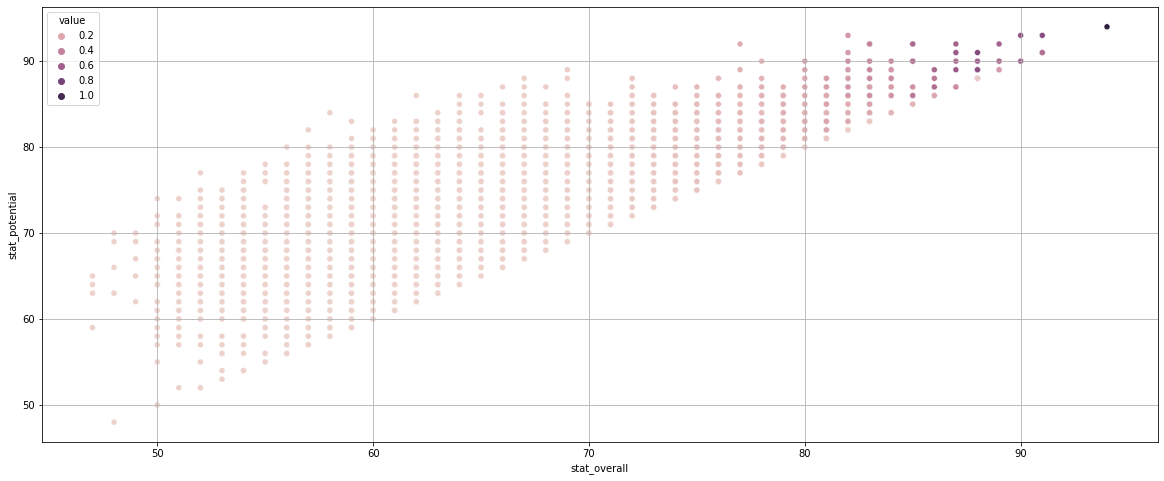

In [79]:
sns.scatterplot(data = df, x = 'stat_overall', y = 'stat_potential', hue = y, )

같은 stat_overall 이더라도 stat_potential에 따라 value가 높은 것을 볼 수 있다.

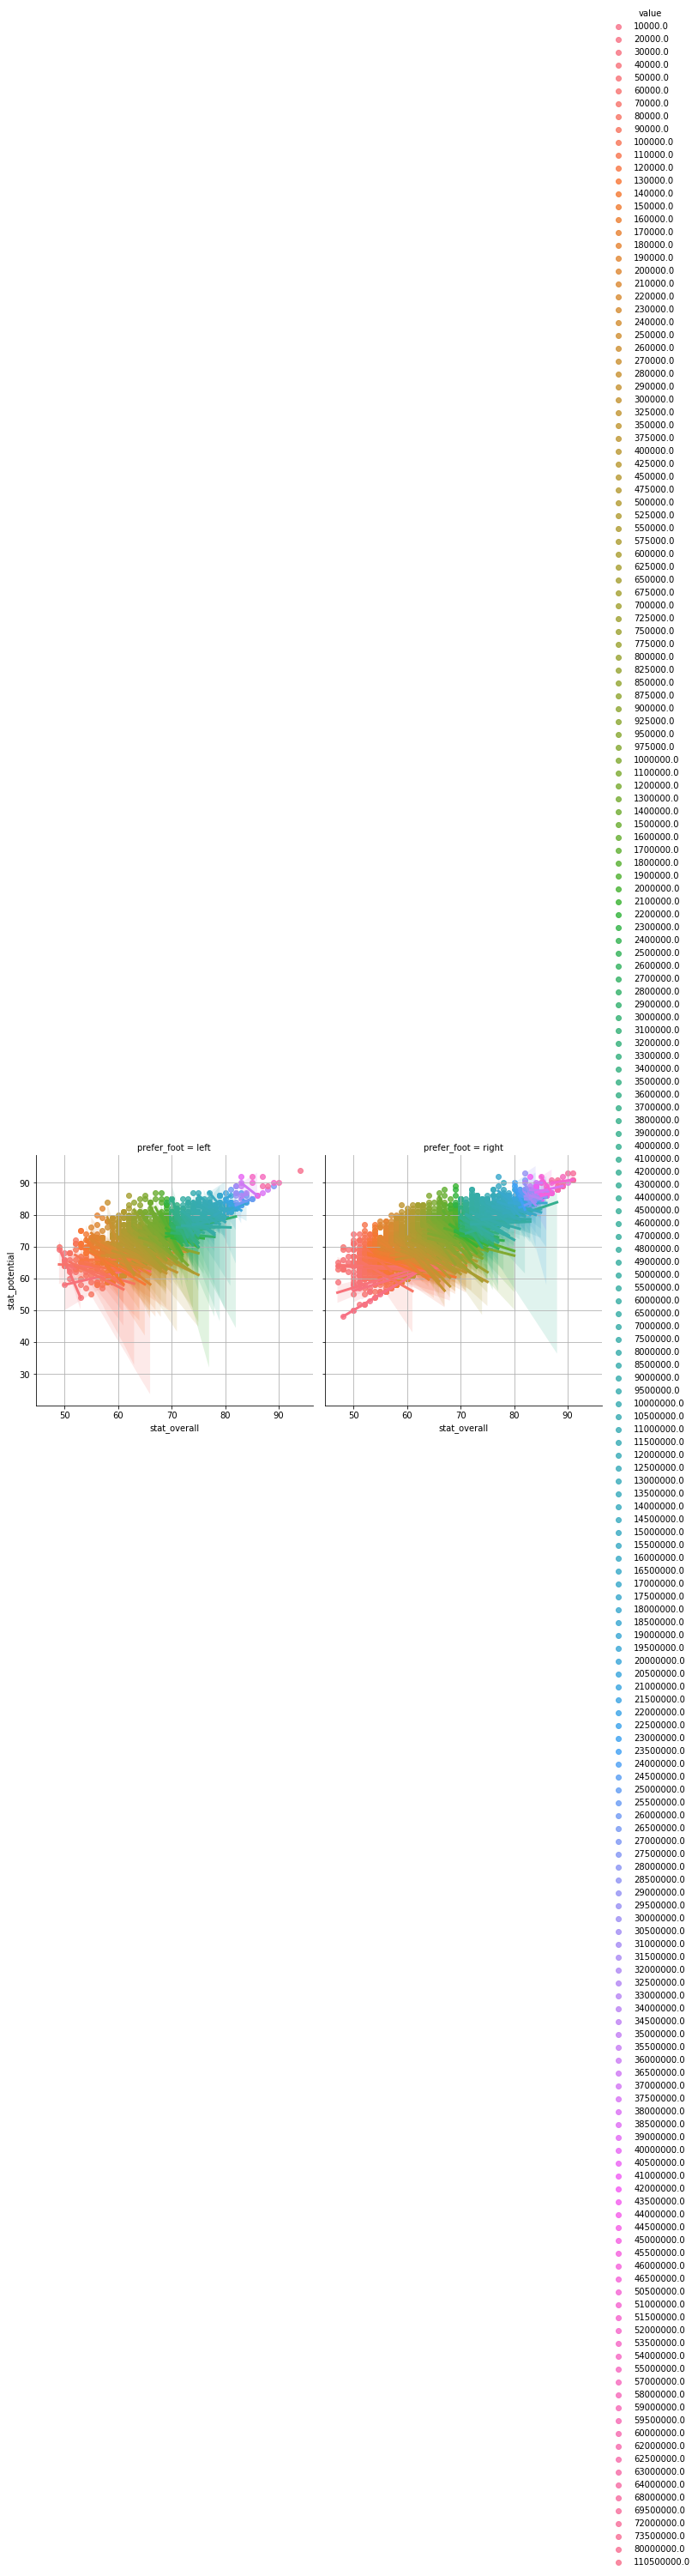

In [80]:
sns.lmplot(data = df, x = 'stat_overall', y = 'stat_potential', hue = y, col = 'prefer_foot', palette = 'husl')

prefer_foot이 left인가 right인가는 value에 크게 영향을 주지 못 하는 것을 알 수 있다.

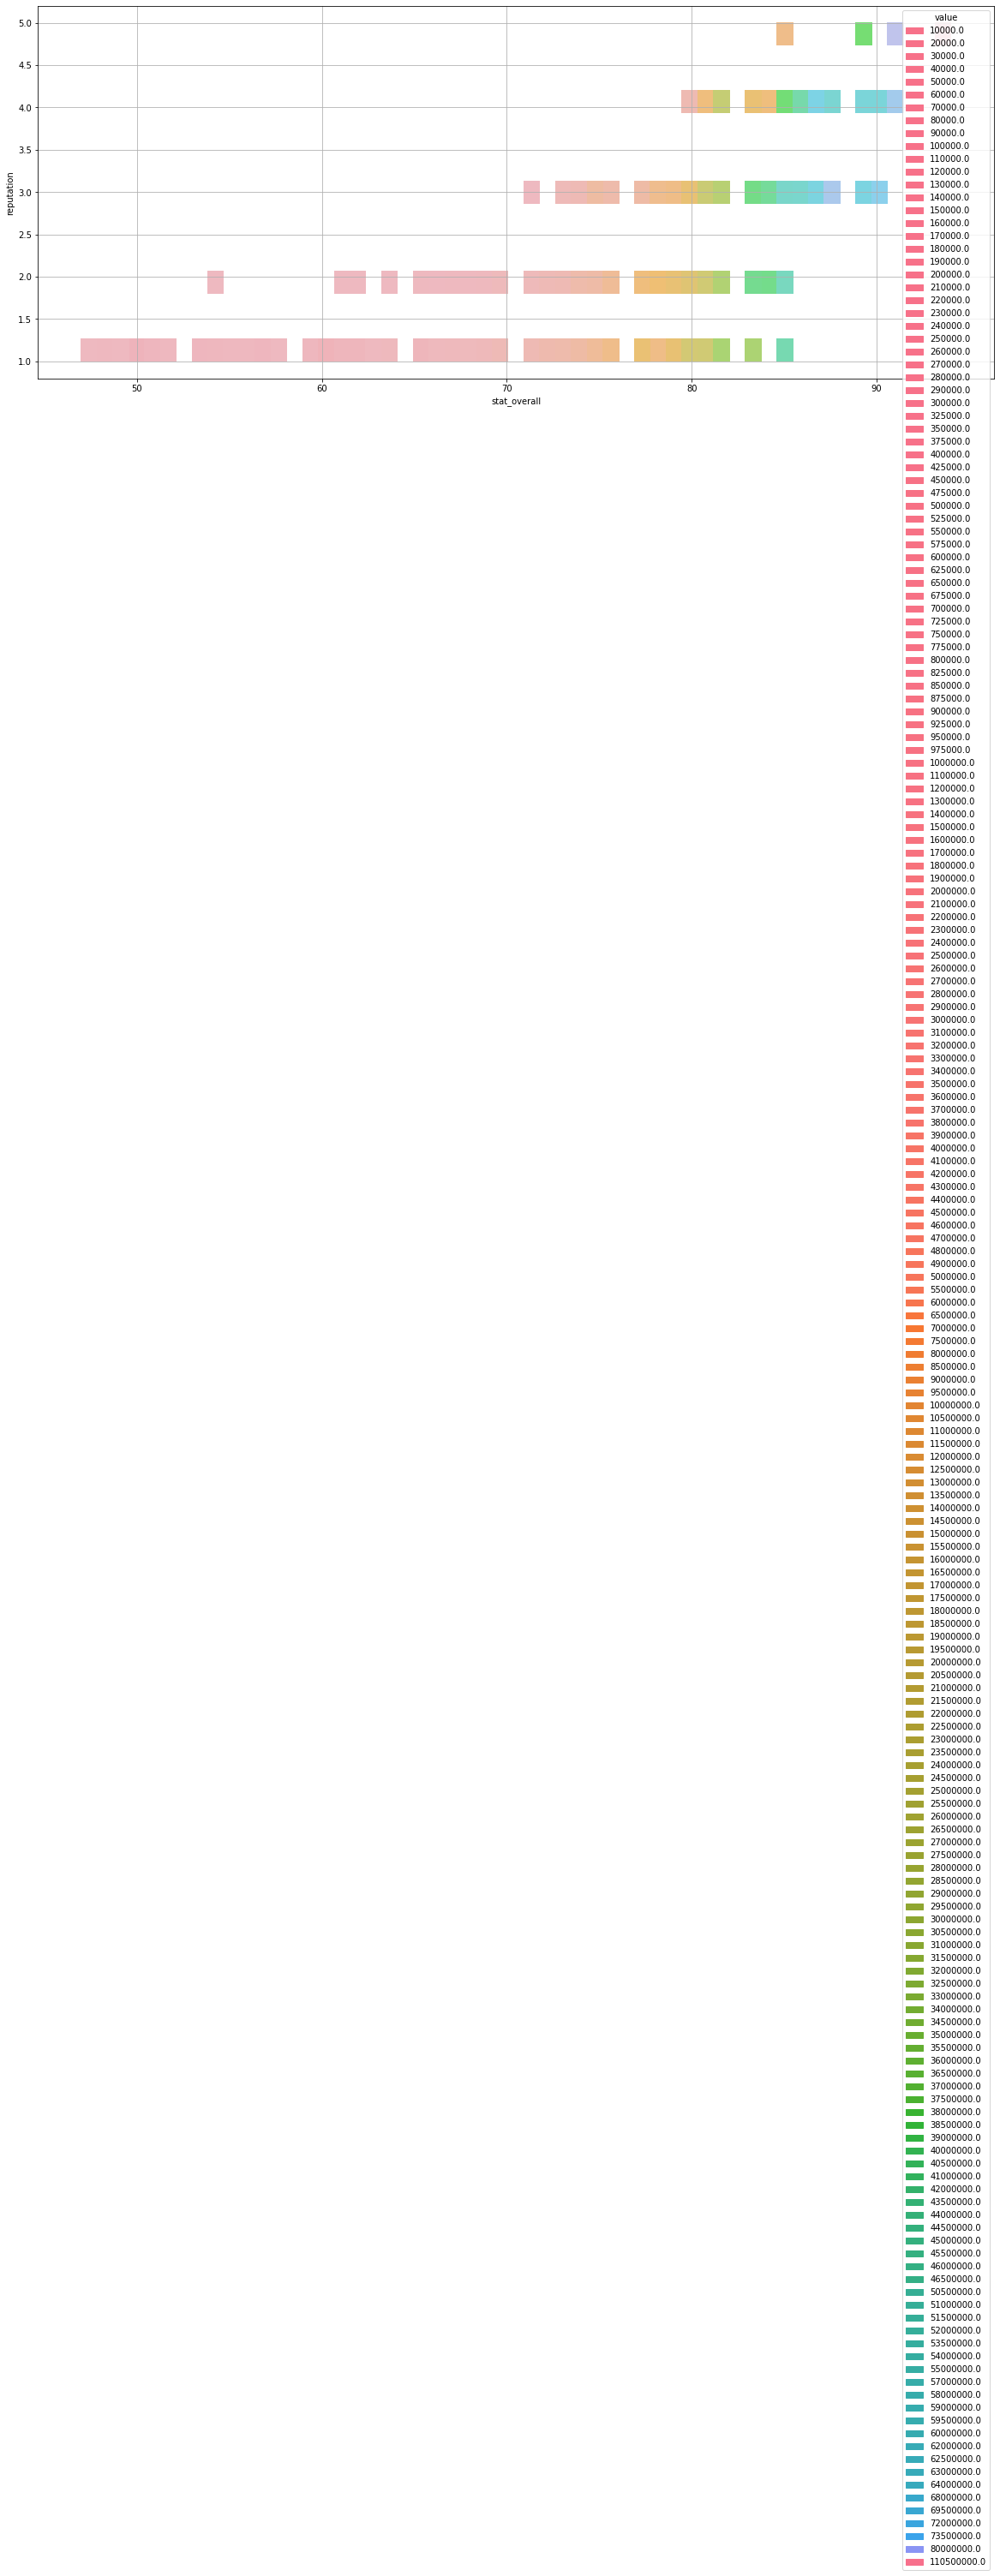

In [70]:
sns.histplot(data = df, x = 'stat_overall', y = 'reputation', hue = y, palette = 'husl')

reputation에 영향을 받는건 맞으나 이는 stat_overall이 높은 선수들이 reputation이 높아서 생기는 현상으로, 오히려 reputation이 높은 선수들의 value가 더 떨어지는 경우도 있다.

이를 볼 때, 실질적으로는 stat_overall이 더 큰 영향을 준다고 볼 수 있다.

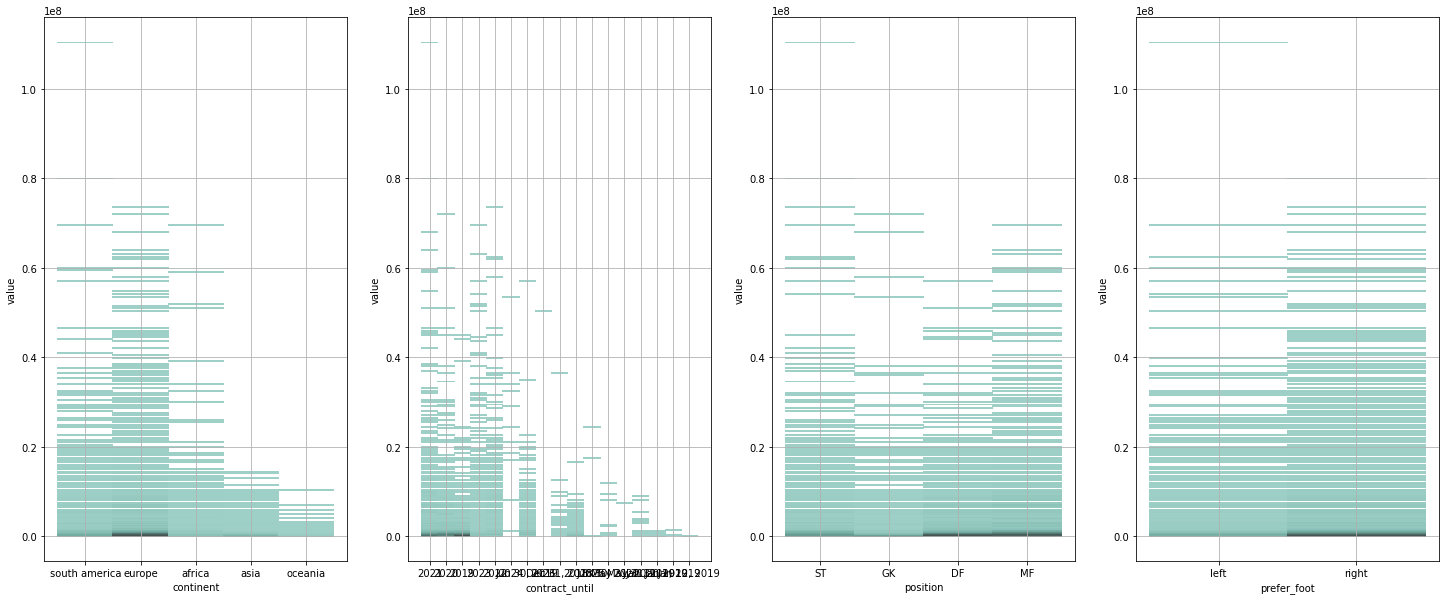

In [65]:
fig, axes = plt.subplots(1, len(noms), figsize = (25,10))
for col, ax in zip(noms, axes):
  sns.histplot(data = df, x = col, y = y, ax = ax)

지금까지 시각화를 진행한 결과, 데이터에 필요한 전처리는

* contract_untill을 간소화 (2019,2020,... -> 19,20,..)
* nums에 min-max / z-score 스케일링
* cotinent -> 원-핫 인코딩 -> [1,0,0], [0,1,0],...